# **Support Vector Machine (SVM)**

# **Task 1: Exploratory Data Analysis (EDA)**

In [3]:
import pandas as pd

# Load the Mushroom dataset
df = pd.read_csv('mushroom.csv')


In [4]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [5]:
# Show basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
# Display the first few rows
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
df.dtypes

,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


# **Visualizations**

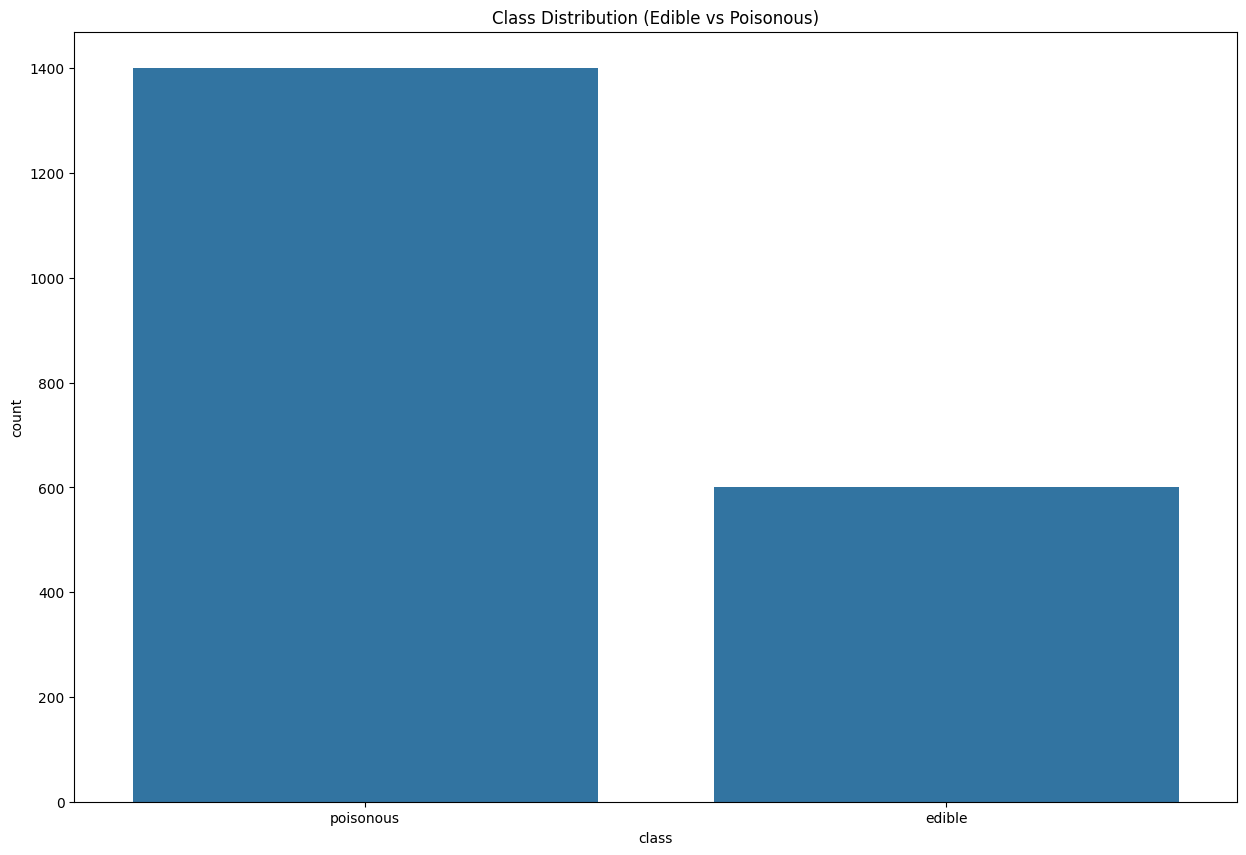

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize feature distributions using count plots
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='class')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()


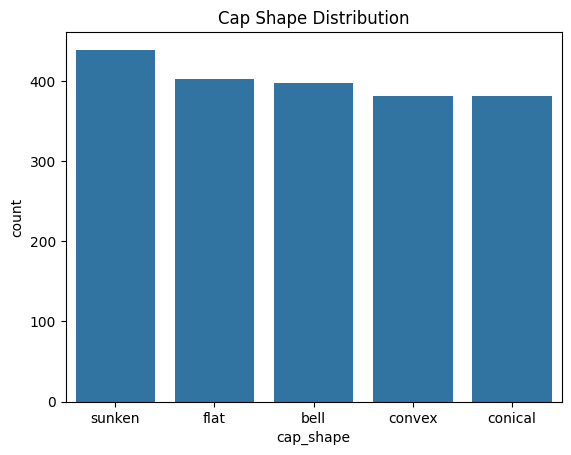

In [9]:
# You can also visualize distributions for other features if necessary (e.g., 'cap_shape')
sns.countplot(data=df, x='cap_shape')
plt.title('Cap Shape Distribution')
plt.show()


**Investigate feature correlations to discern relationships within the data.**

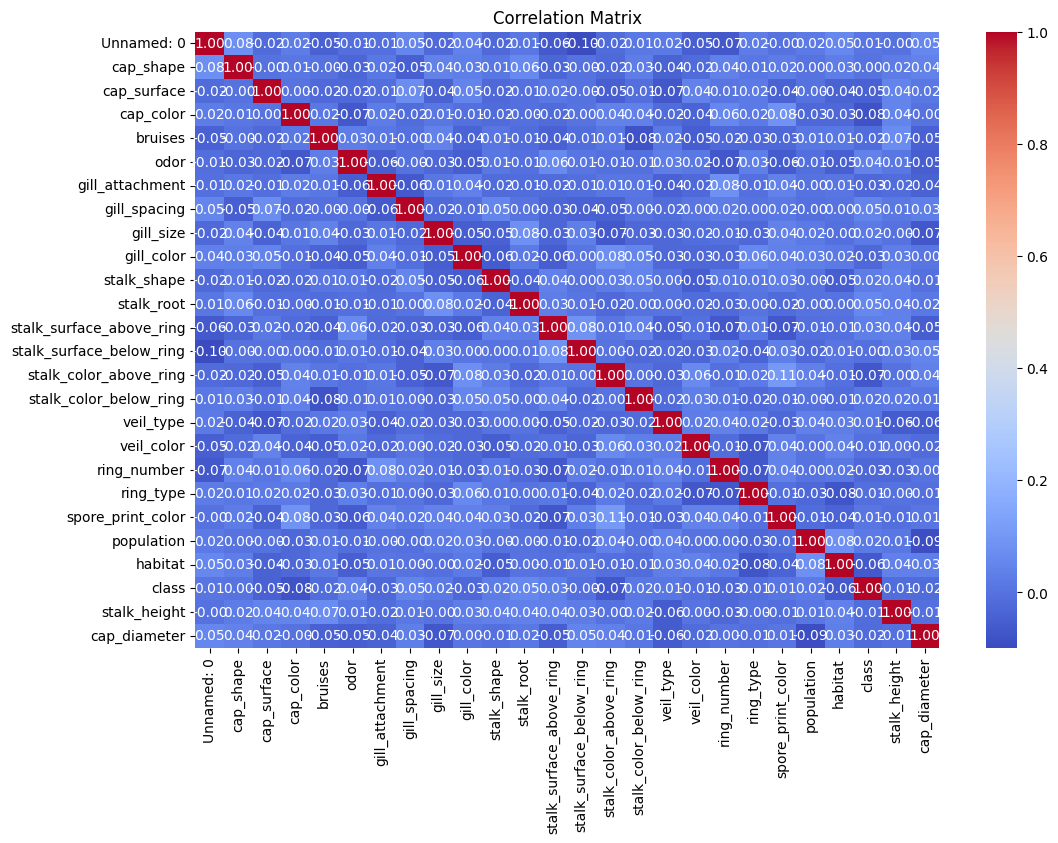

In [10]:
# Encode categorical variables using Label Encoding (if necessary)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Task 2: Data Preprocessing**

**1.	Encode categorical variables if necessary.**

In [11]:
from sklearn.preprocessing import LabelEncoder

#The Mushroom dataset contains categorical variables that need to be encoded using LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply encoding
df_encoded = df.apply(encoder.fit_transform)

# Display encoded data
df_encoded.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


**2.	Split the dataset into training and testing sets.**

In [12]:
from sklearn.model_selection import train_test_split

# Assuming the target variable is 'class' and the features are all other columns
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Task 3: Data Visualization**

**1.	Employ scatter plots, or relevant visualizations to comprehend feature distributions and relationships.**

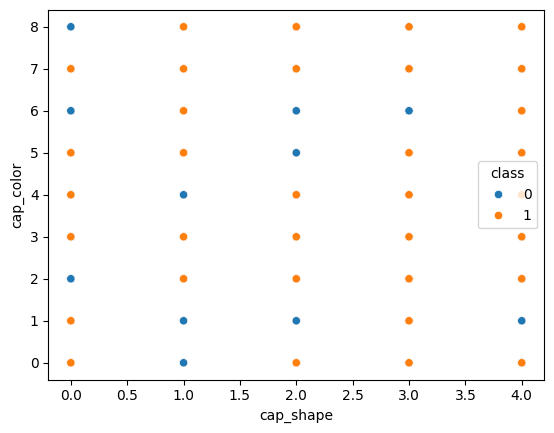

In [13]:
# Scatter plot (example between two features)

sns.scatterplot(x='cap_shape', y='cap_color', hue='class', data=df_encoded)
plt.show()

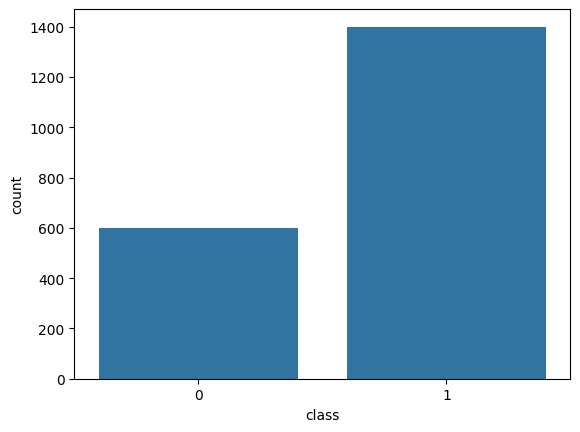

In [14]:
# Visualize class distribution
sns.countplot(x='class', data=df_encoded)
plt.show()


# **Task 4: SVM Implementation**

In [15]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task 5: Visualization of SVM Results**

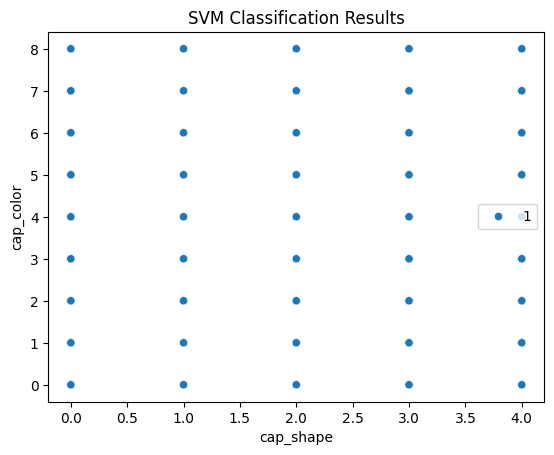

In [17]:
# Choose two actual features from your dataset
feature1 = 'cap_shape'
feature2 = 'cap_color'

# Create a scatter plot of the predictions
sns.scatterplot(x=X_test[feature1], y=X_test[feature2], hue=y_pred)
plt.title("SVM Classification Results")
plt.show()

# **Task 6: Parameter Tuning and Optimization**

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset here)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters to tune
param_dist = {
    'C': [0.1, 1, 10, 100],  # Fewer values for quicker testing
    'kernel': ['linear', 'rbf', 'poly'],  # Fewer kernels
    'gamma': ['scale', 'auto']  # Include gamma as an important hyperparameter for RBF
}

# RandomizedSearchCV (Faster than GridSearchCV)
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)

# Fit the model using randomized search
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", random_search.best_params_)

# Retrieve the best estimator (model)
svm_best = random_search.best_estimator_

# Evaluate the best model
y_pred_best = svm_best.predict(X_test)
print("Accuracy with tuned model:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 1}
Accuracy with tuned model: 0.9777777777777777


# **Task 7: Comparison and Analysis**

**1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

In [19]:
# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Polynomial kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# Compare performance
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0
Polynomial Kernel Accuracy: 0.9777777777777777


**2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

**Strengths:** SVM is effective in handling complex decision boundaries with different kernel types. It can handle high-dimensional data and overfitting issues well with appropriate regularization.

**Weaknesses:** SVM can be computationally expensive, especially for larger datasets. Kernel selection is crucial, and improper kernel or parameter settings can lead to poor performance.

**3.	Discuss practical implications of SVM in real-world classification tasks.**

**Applications:** SVM is widely used in image recognition, bioinformatics (e.g., gene expression classification), and text classification due to its ability to create highly discriminative decision boundaries.

**Limitations:** Not ideal for very large datasets due to its time complexity and memory usage. SVMs can also struggle when there is too much noise or overlapping classes.